# DNA Contour Length Analysis with Machine Learning  
### Master's Degree in Quantitative Biology  
**University of Milan**  
**Course**: Measurement of Nanoscale Interactions in Biological Systems and Data Analysis

---

## Estimating the Rise Per Residue of DNA Using AFM and Predictive Modeling

This project estimates the **rise per residue (rpr)** of DNA molecules by analyzing atomic force microscopy (AFM) measurements of contour lengths from DNA samples with different base pair counts.

The analysis includes both **physics-based data modeling** and a **machine learning classifier**, demonstrating how modern data science techniques can complement traditional scientific methods.

---

## Objectives

- Extract the rise per residue (rpr) using both statistical and curve fitting methods
- Compare experimental results with the known B-form DNA value: **rpr = 0.34 nm**
- Assess compatibility using statistical testing
- Enhance the analysis with machine learning classification based on experimental measurements

---

## Tasks Overview

**Step 1**: Load and inspect contour length data  
**Step 2**: Plot histograms for each DNA sample  
**Step 3**: Estimate mean contour lengths (directly and via Gaussian fits)  
**Step 4**: Perform linear regression to extract rpr  
**Step 5**: Test compatibility with expected B-form DNA value  
**Step 6 (Ex. 1b)**: Repeat the fit accounting for error in both bp and contour length  
**Step 7**: Use a machine learning classifier (**K-Nearest Neighbors (KNN)**) to predict DNA type from contour length. Evaluate model's accuracy and decision boundaries.

---



### Step 1: Load and Inspect DNA Contour Length Data

We begin by loading the measured contour length data of DNA molecules with known nominal lengths of 464 bp, 727 bp, and 960 bp.

Each file contains a series of measured contour lengths (in nanometers) for DNA samples imaged using AFM.

In [16]:
import numpy as np


# Load contour length data for each DNA sample
cl464 = np.loadtxt('dna_464bp.txt')
cl727 = np.loadtxt('dna_727bp.txt')
cl960 = np.loadtxt('dna_960bp.txt')

# Count number of measurements
N464 = cl464.size
N727 = cl727.size
N960 = cl960.size

# Print counts
print('Number of measurements:')
print(f'464 bp: {N464}')
print(f'727 bp: {N727}')
print(f'960 bp: {N960}')


Number of measurements:
464 bp: 180
727 bp: 47
960 bp: 67


### Step 2: Plot Contour Length Histograms

We now visualize the distribution of measured contour lengths for each DNA sample (464 bp, 727 bp, 960 bp).

For each dataset:
- We compute a histogram using a fixed bin width.
- The number of bins is dynamically determined based on the data range.
- All three histograms are plotted together for direct comparison.

This allows us to:
- See the shape and spread of the distributions
- Estimate central tendency (mean) and variation
- Identify any measurement noise or asymmetry


<Figure size 640x480 with 0 Axes>

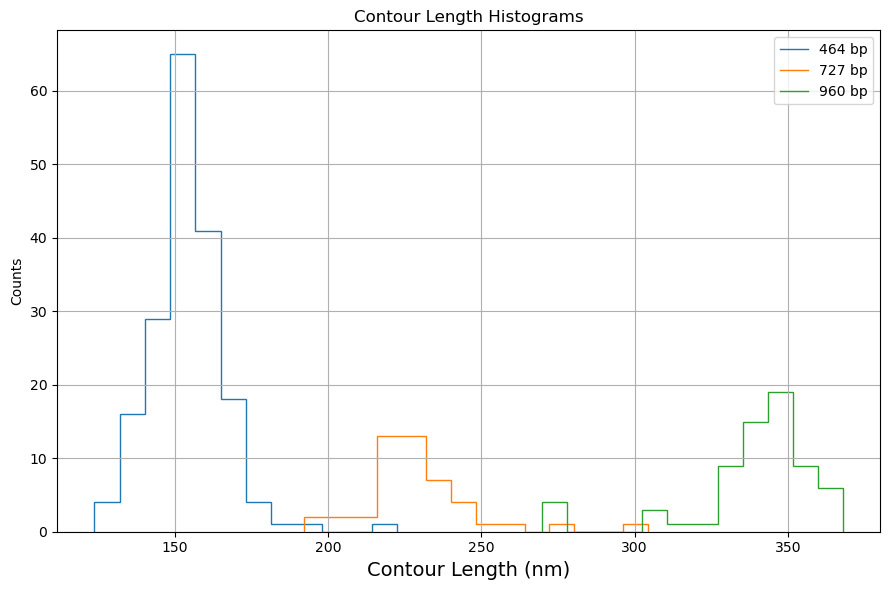

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Set bin width and compute number of bins for each dataset
binwidth = 8
n464bins = round((max(cl464) - min(cl464)) / binwidth)
n727bins = round((max(cl727) - min(cl727)) / binwidth)
n960bins = round((max(cl960) - min(cl960)) / binwidth)

# Create histograms (bin edges and counts)
x464counts, x464bins = np.histogram(cl464, n464bins)
x727counts, x727bins = np.histogram(cl727, n727bins)
x960counts, x960bins = np.histogram(cl960, n960bins)

# Plot the histograms using step plots
plt.clf()
plt.figure(figsize=(9, 6))
plt.stairs(x464counts, x464bins, label='464 bp')
plt.stairs(x727counts, x727bins, label='727 bp')
plt.stairs(x960counts, x960bins, label='960 bp')

# Add labels and title
plt.xlabel('Contour Length (nm)', fontsize=14)
plt.ylabel('Counts')
plt.title('Contour Length Histograms')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 3a: Direct Calculation of Mean and Uncertainty

For each DNA dataset, we compute:

- The **mean contour length**:  
  $ \bar{x} = \frac{1}{N} \sum x_i $
  
- The **standard deviation (std)**, which shows the variability in individual molecule lengths.

- The **standard error of the mean (SEM)**, which estimates how precisely the mean is known:  
  $ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}} $

These values will later be used to fit the rise-per-residue (rpr) and compare against the expected B-form DNA value.


In [18]:
# 464 bp
cl_mean_464 = np.mean(cl464)
cl_std_464 = np.std(cl464)
cl_std_mean_464 = cl_std_464 / np.sqrt(N464)

print('cl_464bp = ', f'{cl_mean_464:6.4f}', '+/-', f'{cl_std_464:6.4f}', '(+/-', f'{cl_std_mean_464:6.4f}', ') nm')

# 727 bp
cl_mean_727 = np.mean(cl727)
cl_std_727 = np.std(cl727)
cl_std_mean_727 = cl_std_727 / np.sqrt(N727)

print('cl_727bp = ', f'{cl_mean_727:6.4f}', '+/-', f'{cl_std_727:6.4f}', '(+/-', f'{cl_std_mean_727:6.4f}', ') nm')

# 960 bp
cl_mean_960 = np.mean(cl960)
cl_std_960 = np.std(cl960)
cl_std_mean_960 = cl_std_960 / np.sqrt(N960)

print('cl_960bp = ', f'{cl_mean_960:6.4f}', '+/-', f'{cl_std_960:6.4f}', '(+/-', f'{cl_std_mean_960:6.4f}', ') nm')


cl_464bp =  154.3972 +/- 11.7408 (+/- 0.8751 ) nm
cl_727bp =  228.7809 +/- 18.4398 (+/- 2.6897 ) nm
cl_960bp =  338.9537 +/- 21.2835 (+/- 2.6002 ) nm


### Step 3b: Gaussian Fit of Contour Length Histograms

To refine our estimate of the mean contour length for each DNA sample, we fit a **Gaussian function** to the histogram data:

$
G(x) = A \cdot \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)
$

Where:
- $A$ is the peak amplitude
- $\mu$ is the fitted mean (estimated contour length)
- $\sigma$ is the standard deviation of the distribution

This fit provides:
- A robust estimate of the **mean contour length** ($\mu$)
- The **uncertainty on the mean**, calculated as $\sigma / \sqrt{N}$
- A visual way to assess how well a Gaussian describes the data

These fitted values are then used to estimate the rise per residue in later steps.



464 bp:
  Mean = 153.8564 ± 0.6361 nm
  Std = 9.3625 ± 0.6358 nm
  Std(mean) = 0.6978 nm

727 bp:
  Mean = 226.1203 ± 0.9330 nm
  Std = 9.2910 ± 0.9330 nm
  Std(mean) = 1.3552 nm

960 bp:
  Mean = 344.8377 ± 1.1590 nm
  Std = 10.8822 ± 1.1882 nm
  Std(mean) = 1.3295 nm


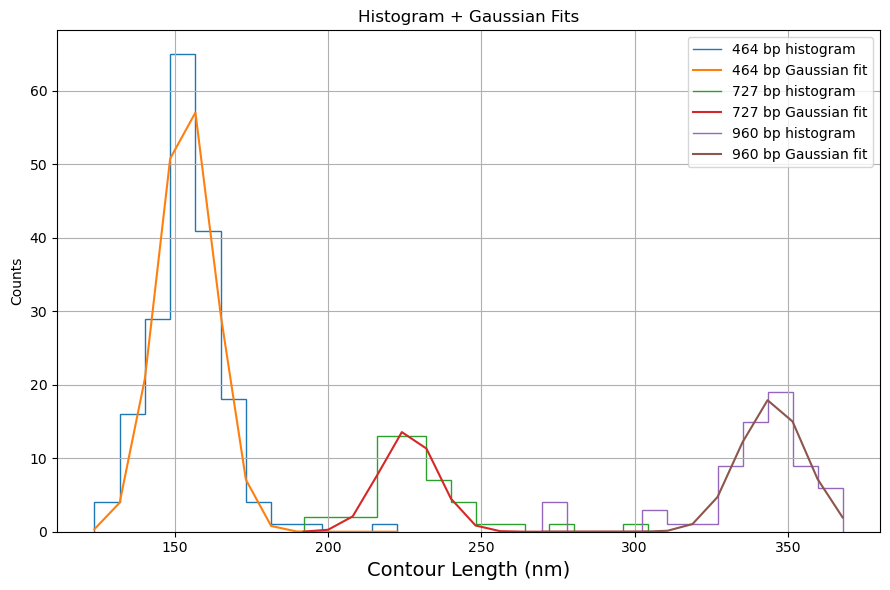

In [19]:
# Define Gaussian function
def gaussfit(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

# --- Helper function to do Gaussian fit ---
def fit_gaussian(xcounts, xbins, mean_guess, std_guess, N, label):
    xpos = 0.5 * (xbins[:-1] + xbins[1:])  # Bin centers
    p0 = [max(xcounts), mean_guess, std_guess]  # Initial guess
    popt, pcov = curve_fit(gaussfit, xpos, xcounts, p0)
    perr = np.sqrt(np.diag(pcov))

    ampl, mean, std = popt
    ampl_err, mean_err, std_err = perr
    std_mean = std / np.sqrt(N)

    print(f'\n{label}:')
    print(f'  Mean = {mean:.4f} ± {mean_err:.4f} nm')
    print(f'  Std = {std:.4f} ± {std_err:.4f} nm')
    print(f'  Std(mean) = {std_mean:.4f} nm')

    # Plot
    plt.stairs(xcounts, xbins, label=f'{label} histogram')
    plt.plot(xbins, gaussfit(xbins, *popt), label=f'{label} Gaussian fit')
    return mean, std_mean

# --- Fit and plot all three ---
plt.figure(figsize=(9, 6))

x464_mean_fit, x464_std_mean = fit_gaussian(x464counts, x464bins, cl_mean_464, cl_std_464, N464, "464 bp")
x727_mean_fit, x727_std_mean = fit_gaussian(x727counts, x727bins, cl_mean_727, cl_std_727, N727, "727 bp")
x960_mean_fit, x960_std_mean = fit_gaussian(x960counts, x960bins, cl_mean_960, cl_std_960, N960, "960 bp")

# Final plot touches
plt.xlabel('Contour Length (nm)', fontsize=14)
plt.ylabel('Counts')
plt.title('Histogram + Gaussian Fits')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Store results for next step ---
bp = np.array([464, 727, 960])
cl = np.array([x464_mean_fit, x727_mean_fit, x960_mean_fit])
cl_err = np.array([x464_std_mean, x727_std_mean, x960_std_mean])


### Step 4: Estimate the Rise Per Residue (rpr) via Linear Fit

To estimate the rise per residue (rpr), we perform a **weighted linear regression** on the data:

$
[
text{Contour Length (nm)} = \text{rpr} \cdot \text{bp} + \text{cl}_0
]
$

- `rpr`: the rise per base pair, in nm
- `cl₀`: intercept term
- The fit is **weighted** using the uncertainty in the mean contour lengths from the Gaussian fits

We use `scipy.optimize.curve_fit` to perform the fit and propagate the error from the covariance matrix.

This slope (`rpr`) will be compared to the theoretical value for B-form DNA:  
$
[
text{rpr}_{\text{B-form}} = 0.34 \, \text{nm}
]
$


The best fit parameters are:
rpr = 0.3681 ± 0.0536 nm
cl0 = -19.6475 ± 33.6898 nm


<Figure size 640x480 with 0 Axes>

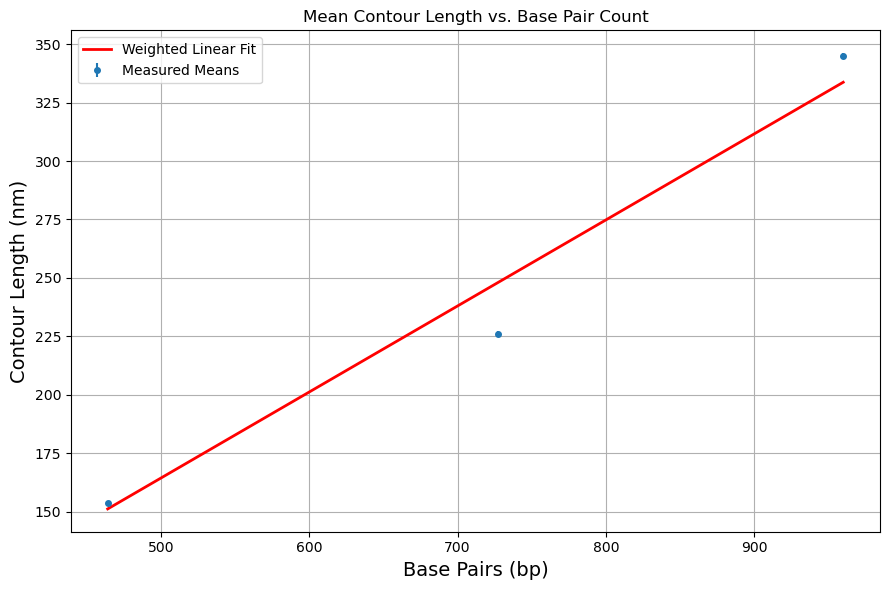

In [20]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

# Define a straight-line function for regression
def linfit(x, m, q):
    return m * x + q

# Perform weighted linear fit
popt, pcov = curve_fit(linfit, bp, cl, sigma=cl_err)
perr = np.sqrt(np.diag(pcov))

# Extract results
rpr = popt[0]        # slope
rpr_err = perr[0]    # error on slope
cl0 = popt[1]        # intercept
cl0_err = perr[1]    # error on intercept

# Print results
print("The best fit parameters are:")
print(f"rpr = {rpr:.4f} ± {rpr_err:.4f} nm")
print(f"cl0 = {cl0:.4f} ± {cl0_err:.4f} nm")

# Plot with error bars
plt.clf()
plt.figure(figsize=(9, 6))
plt.errorbar(bp, cl, yerr=cl_err, fmt='o', markersize=4, label='Measured Means')
plt.plot(bp, linfit(bp, rpr, cl0), label='Weighted Linear Fit', color='red', lw=2)
plt.xlabel('Base Pairs (bp)', fontsize=14)
plt.ylabel('Contour Length (nm)', fontsize=14)
plt.title('Mean Contour Length vs. Base Pair Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 5: Assess Compatibility with Expected rpr = 0.34 nm

We compare our experimentally determined rise per residue (rpr) with the expected value for B-form DNA: **0.34 nm**.

To do this, we compute a **t-statistic**:

$$
t = \frac{|\text{rpr}_{\text{measured}} - \text{rpr}_{\text{expected}}|}{\text{uncertainty in rpr}}
$$

- If $t < 2$, the result is **statistically compatible** with the expected value (at 95% confidence)
- If $t > 2$, the result is **statistically different**

This test is based on the assumption of a normal distribution and a significance level of $\alpha = 0.05$.


In [21]:
# Expected theoretical value
rpr0 = 0.34

# Calculate t-statistic
t = np.abs(rpr0 - rpr) / rpr_err

# Print result
print(f"t = {t:.4f}")
if t < 2:
    print("t-value is below 2 → Result is statistically compatible with the expected value (rpr = 0.34 nm)")
else:
    print("t-value is above 2 → Result is statistically incompatible with the expected value (rpr = 0.34 nm)")


t = 0.5240
t-value is below 2 → Result is statistically compatible with the expected value (rpr = 0.34 nm)


### Step 6: Double-Weighted Linear Fit with Base Pair Error

In Exercise 1a, only errors on the measured contour lengths were considered.

In this exercise, we also account for **uncertainty in the base pair counts** (2% relative error). This introduces additional uncertainty in the x-variable, which affects the y-error when fitting:

$$
\sigma_{\text{total}} = \sqrt{\sigma_y^2 + (m \cdot \sigma_x)^2}
$$

Since the slope \( m \) (rpr) is initially unknown, we solve the problem **iteratively**:
- Start with the previous rpr value
- Update the effective error on each point
- Fit again using updated weights
- Repeat until convergence (change in rpr is below a set threshold)

This method provides a more accurate estimation of rpr with full uncertainty propagation.



Fit iteration 0
Effective total errors: [0.69783839 1.35523848 1.32947676]
rpr = 0.3681 ± 0.0536 nm

Fit iteration 1
Effective total errors: [3.48627554 5.52071262 7.19097185]
rpr = 0.3584 ± 0.0622 nm

Fit iteration 2
Effective total errors: [3.39864697 5.38490397 7.00910201]
rpr = 0.3585 ± 0.0622 nm

Final result with x and y error weighting:
rpr_best = 0.3585 ± 0.0622 nm


<Figure size 640x480 with 0 Axes>

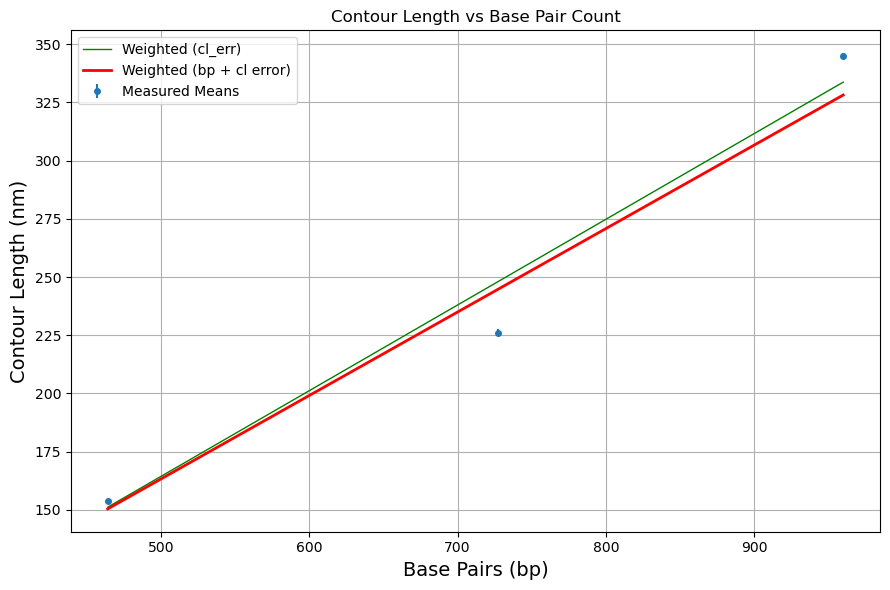

In [22]:
# Relative error on base pair count
bp_relerr = 0.02
tolerance = 0.005 
iteration = 0

# Initial guess from previous fit
previous_rpr = rpr
popt[0] = 0 

# Iterative double-weighted regression
while (np.abs(previous_rpr - popt[0]) > tolerance and iteration < 20):
    print(f"\nFit iteration {iteration}")
    previous_rpr = popt[0]
    
    
    cl_err_eff = np.sqrt(cl_err**2 + (bp * bp_relerr)**2 * previous_rpr**2)
    print("Effective total errors:", cl_err_eff)
    
    popt, pcov = curve_fit(linfit, bp, cl, sigma=cl_err_eff)
    perr = np.sqrt(np.diag(pcov))
    
    print("rpr = {:.4f} ± {:.4f} nm".format(popt[0], perr[0]))
    iteration += 1

rpr_xy = popt[0]
rpr_err_xy = perr[0]
cl0_xy = popt[1]

print("\nFinal result with x and y error weighting:")
print(f"rpr_best = {rpr_xy:.4f} ± {rpr_err_xy:.4f} nm")

# Plot both fits for comparison
plt.clf()
plt.figure(figsize=(9, 6))
plt.errorbar(bp, cl, yerr=cl_err, fmt='o', markersize=4, label='Measured Means')
plt.plot(bp, linfit(bp, rpr, cl0), label='Weighted (cl_err)', color='green', lw=1)
plt.plot(bp, linfit(bp, rpr_xy, cl0_xy), label='Weighted (bp + cl error)', color='red', lw=2)
plt.xlabel('Base Pairs (bp)', fontsize=14)
plt.ylabel('Contour Length (nm)', fontsize=14)
plt.title('Contour Length vs Base Pair Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 7a: Classify DNA Samples Based on Contour Length Using Machine Learning

We build a simple classifier that predicts the DNA group (464 bp, 727 bp, or 960 bp) based solely on a single contour length measurement.

Steps:
1. Combine all measurements into a single dataset
2. Label each data point by its original group
3. Train a classifier (e.g., K-Nearest Neighbors)
4. Evaluate the model's accuracy
5. Visualize predictions vs. actual classes


Classification Report:
               precision    recall  f1-score   support

      464 bp       1.00      0.95      0.97        55
      727 bp       0.82      1.00      0.90        14
      960 bp       1.00      1.00      1.00        20

    accuracy                           0.97        89
   macro avg       0.94      0.98      0.96        89
weighted avg       0.97      0.97      0.97        89

Confusion Matrix:
 [[52  3  0]
 [ 0 14  0]
 [ 0  0 20]]


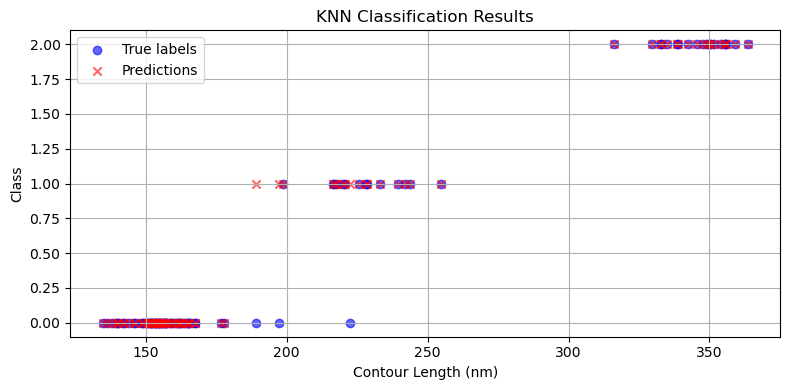

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Combine all contour lengths
X = np.concatenate([cl464, cl727, cl960]).reshape(-1, 1)

# Create labels: 0 = 464 bp, 1 = 727 bp, 2 = 960 bp
y = np.concatenate([
    np.zeros(len(cl464)),
    np.ones(len(cl727)),
    np.full(len(cl960), 2)
])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['464 bp', '727 bp', '960 bp']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: visualize decision boundary
plt.figure(figsize=(8, 4))
plt.scatter(X_test, y_test, c='blue', label='True labels', alpha=0.6)
plt.scatter(X_test, y_pred, c='red', marker='x', label='Predictions', alpha=0.6)
plt.xlabel("Contour Length (nm)")
plt.ylabel("Class")
plt.title("KNN Classification Results")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 7b: Visualizing Decision Boundaries

We plot the decision boundaries of the K-Nearest Neighbors (KNN) classifier trained on contour length data.

This shows how the model separates the input space based on contour length and assigns each region to a DNA class.


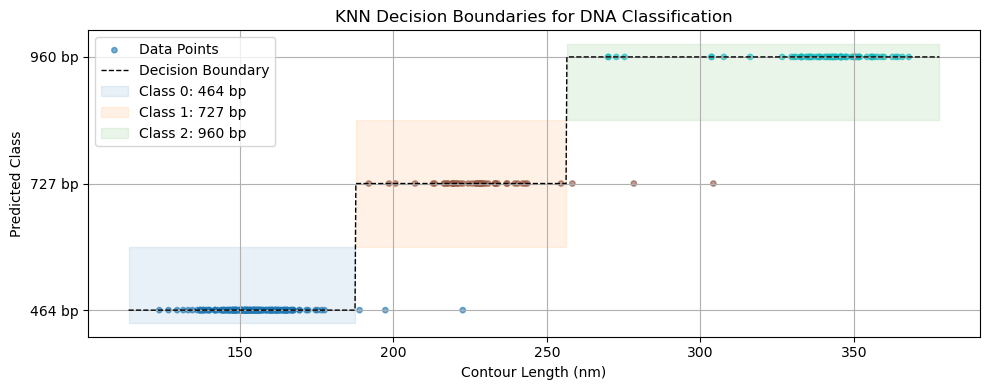

In [24]:
# Create fine grid of contour lengths
x_grid = np.linspace(X.min() - 10, X.max() + 10, 1000).reshape(-1, 1)
y_grid = knn.predict(x_grid)

# Plot decision boundaries
plt.figure(figsize=(10, 4))
plt.scatter(X, y, c=y, cmap='tab10', s=15, alpha=0.6, label='Data Points')
plt.plot(x_grid, y_grid, color='black', linestyle='--', linewidth=1, label='Decision Boundary')
plt.fill_between(x_grid.ravel(), -0.1, 0.5, where=y_grid==0, color='tab:blue', alpha=0.1, label='Class 0: 464 bp')
plt.fill_between(x_grid.ravel(), 0.5, 1.5, where=y_grid==1, color='tab:orange', alpha=0.1, label='Class 1: 727 bp')
plt.fill_between(x_grid.ravel(), 1.5, 2.1, where=y_grid==2, color='tab:green', alpha=0.1, label='Class 2: 960 bp')

plt.xlabel("Contour Length (nm)")
plt.ylabel("Predicted Class")
plt.title("KNN Decision Boundaries for DNA Classification")
plt.yticks([0, 1, 2], ['464 bp', '727 bp', '960 bp'])
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
